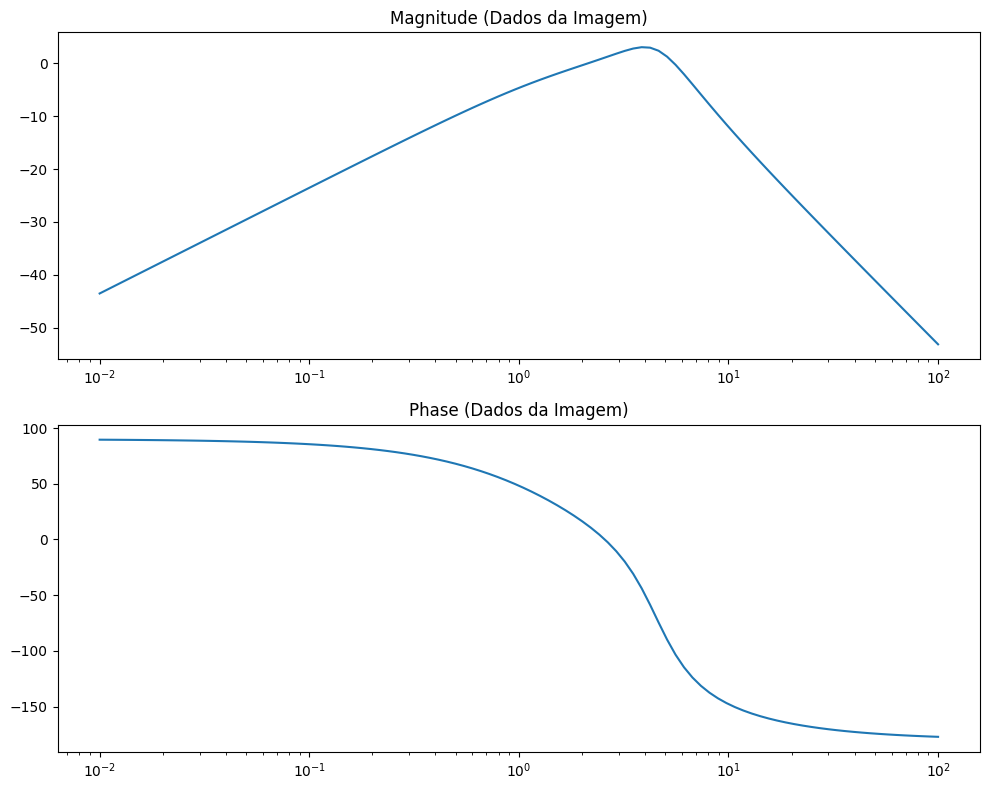

(array([0.]),
 array([-1.69705863+4.20350303j, -1.69705863-4.20350303j,
        -1.60588273+0.j        ]))

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2zpk, bode


# Atualizando os valores de acordo com a imagem fornecida
K_novo = 22
a2_imagem = 5
a1_imagem = 26
a0_imagem = 33

# Definindo a nova função de transferência de acordo com os valores da imagem
numerador_imagem = [K_novo,0]
denominador_imagem = [1, a2_imagem, a1_imagem, a0_imagem]

# Encontrando polos e zeros da função de transferência atualizada com a imagem
zeros_imagem, polos_imagem, _ = tf2zpk(numerador_imagem, denominador_imagem)

# Calculando as margens de fase e ganho para o sistema atualizado com os dados da imagem
w_imagem, mag_imagem, phase_imagem = bode((numerador_imagem, denominador_imagem))

# Plotando o diagrama de Bode para o sistema atualizado com os dados da imagem
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
ax1.semilogx(w_imagem, mag_imagem)  # Magnitude
ax1.set_title('Magnitude (Dados da Imagem)')
ax2.semilogx(w_imagem, phase_imagem)  # Phase
ax2.set_title('Phase (Dados da Imagem)')
plt.tight_layout()
plt.show()

zeros_imagem, polos_imagem


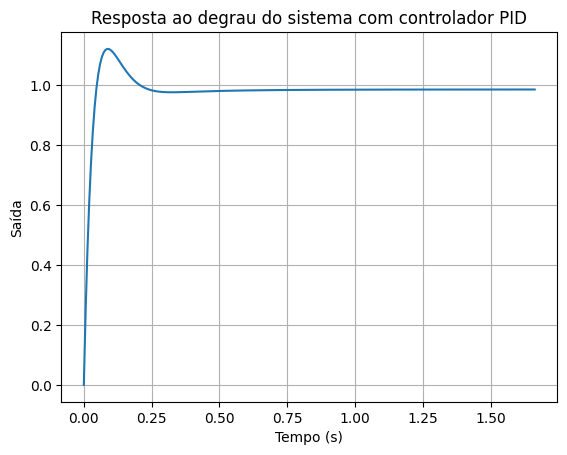

(31.04044426291711, 101.9337, 1.85665982156894)

In [48]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Parâmetros do sistema dados pela matrícula, z0 = 0
K = 22
a2 = 5
a1 = 26
a0 = 33

# Função de transferência do sistema
G = ctl.TransferFunction([K,0], [1, a2, a1, a0])

Kp = 31.040444262917109
Ki = 101.9337	
Kd = 1.856659821568940

# Definindo o controlador PID
# O controlador PID é representado pela função de transferência: Gc(s) = Kp + Ki/s + Kd*s
controlador_PID = ctl.TransferFunction([Kd, Kp, Ki], [1, 0])

# Sistema em malha fechada com controlador
sistema_malha_fechada = ctl.feedback(controlador_PID * G)

# Simulação de resposta ao degrau
tempo, resposta = ctl.step_response(sistema_malha_fechada)

# Plotando a resposta ao degrau
plt.plot(tempo, resposta)
plt.title('Resposta ao degrau do sistema com controlador PID')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.grid()
plt.show()

Kp , Ki , Kd 


In [58]:
G

TransferFunction(array([22,  0]), array([ 1,  5, 26, 33]))

Margem de Ganho (GM): inf dB
Margem de Fase (PM): 74.95 graus
Frequência de ganho de cruzamento (wg): nan rad/s
Frequência de cruzamento de fase (wp): 43.06 rad/s


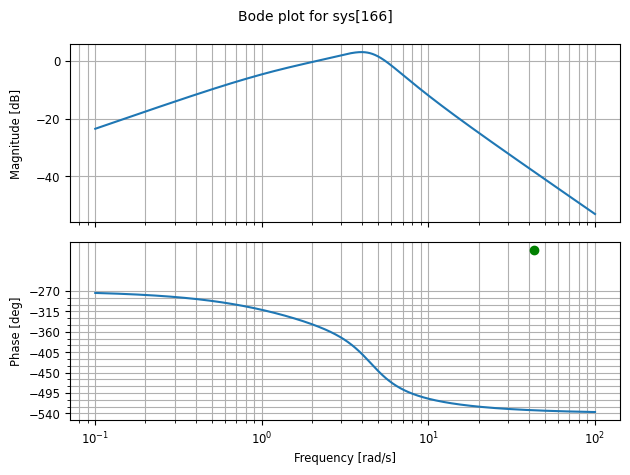

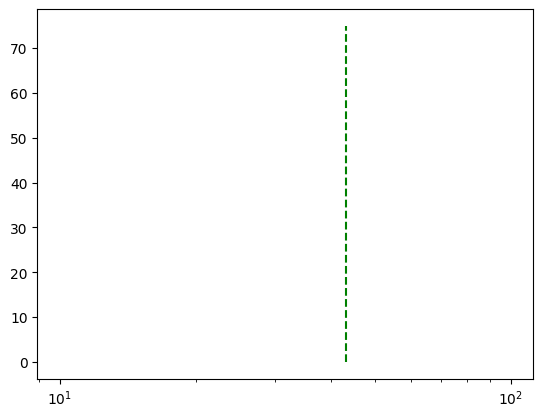

In [57]:
import control as ctl

# Defina a função de transferência do seu sistema aqui
# Por exemplo: G = ctl.TransferFunction([1], [1, 2, 1])

# Parâmetros do sistema - estes devem ser os parâmetros reais do seu sistema
K = 22
a2 = 5
a1 = 26
a0 = 33

# Cria a função de transferência
G = ctl.TransferFunction([K,0], [1, a2, a1, a0])


# Calcula as margens de ganho e fase e as frequências em que elas ocorrem
GM, PM, wg, wp = ctl.margin(controlador_PID * G)

# Convertendo a margem de ganho para dB
GM_dB = 20 * np.log10(GM)

# Imprimindo os valores
print(f"Margem de Ganho (GM): {GM_dB:.2f} dB")
print(f"Margem de Fase (PM): {PM:.2f} graus")
print(f"Frequência de ganho de cruzamento (wg): {wg:.2f} rad/s")
print(f"Frequência de cruzamento de fase (wp): {wp:.2f} rad/s")

# Para visualizar as margens no Diagrama de Bode
mag, phas = ctl.bode(G, dB=True)

# Para exibir onde as margens ocorrem no diagrama, podemos adicionar marcas nesses pontos
if GM > 0:  # Se GM é finito
    plt.figure(1)
    plt.semilogx([wg, wg], [0, -GM_dB], 'r--')
    plt.figure(2)
    plt.semilogx([wg], [PM-180], 'ro')
if PM > 0:  # Se PM é finito
    plt.figure(1)
    plt.semilogx([wp], [-180], 'go')
    plt.figure(2)
    plt.semilogx([wp, wp], [0, PM], 'g--')

plt.show()
